#PREPARATIVOS DEL ESPACIO DE TRABAJO

In [1]:
# Montar Google Drive para acceder a los archivos de la carpeta
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
folder_path ='/content/drive/MyDrive/DATA ANALYST PORTFOLIO/VIZ CON PYTHON'
os.chdir(folder_path) # Change directory
print("Nuevo directorio de trabajo: ")
!pwd

Nuevo directorio de trabajo: 
/content/drive/MyDrive/DATA ANALYST PORTFOLIO/VIZ CON PYTHON


In [3]:
!pip install pandas
!pip install pandas-datareader

In [4]:
# Importo las librerias que usaré
import numpy as np
import pandas as pd
from random import sample
import random as random
from datetime import date
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display

###El archivo *model.txt* se trata de una simulación realizada con un modelo numérico de predicción meteorológica en una zona montañosa de los Alpes

In [5]:
#Leo el archivo
filename = 'model.txt'
df_principal = pd.read_csv(filename, delim_whitespace=True, skiprows = 3, parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')
df_principal.head(5)

,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
Timestamp,,,,,,,
1984-01-01 00:00:00,20.8,243,7.3,1.25,1002.8,0.04,86.3
1984-01-01 01:00:00,20.8,243,7.3,1.25,1002.2,0.04,86.9
1984-01-01 02:00:00,20.6,243,7.4,1.24,1001.8,0.04,87.0
1984-01-01 03:00:00,20.4,244,7.5,1.24,1001.5,0.05,86.2
1984-01-01 04:00:00,20.3,245,7.5,1.24,1001.2,0.05,85.6


###**Exploramos los datos**

In [ ]:
df_principal.shape
# 7 columnas 277,800 filas

(277800, 7)

In [ ]:
#Exploramos los datos
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 277800 entries, 1984-01-01 00:00:00 to 2015-09-10 23:00:00
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   M(m/s)    277800 non-null  float64
 1   D(deg)    277800 non-null  int64  
 2   T(C)      277800 non-null  float64
 3   De(k/m3)  277800 non-null  float64
 4   PRE(hPa)  277800 non-null  float64
 5   RiNumber  277800 non-null  float64
 6   RH(%)     277800 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 17.0 MB


###**Con el conjunto de datos haremos lo siguiente:**


1.   Representar la matriz scatter de la velocidad y orientación del viento de los primeros mil registros M(m/s) y D(deg).
2.   Misma matriz scatter para los 1000 registros con mayor velocidad, ordenados.



array([[<Axes: xlabel='M(m/s)', ylabel='M(m/s)'>,
        <Axes: xlabel='D(deg)', ylabel='M(m/s)'>],
       [<Axes: xlabel='M(m/s)', ylabel='D(deg)'>,
        <Axes: xlabel='D(deg)', ylabel='D(deg)'>]], dtype=object)

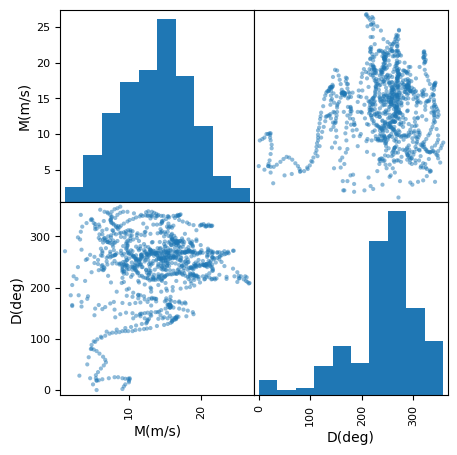

In [ ]:
#Representar la matriz scatter de la velocidad y orientación del viento de los primeros mil registros M(m/s) y D(deg).
pd.plotting.scatter_matrix(df_principal.loc[df_principal.index[:1000], 'M(m/s)':'D(deg)'], figsize=(5, 5))

In [ ]:
#Misma matriz scatter para los 1000 registros con mayor velocidad, ordenados

#Creo un subset para ordenarlo previamente
df_subset = df_principal.loc[df_principal.index[:1000], 'M(m/s)':'D(deg)']
df_subset.head(7)

,M(m/s),D(deg)
Timestamp,,
1984-01-01 00:00:00,20.8,243
1984-01-01 01:00:00,20.8,243
1984-01-01 02:00:00,20.6,243
1984-01-01 03:00:00,20.4,244
1984-01-01 04:00:00,20.3,245
1984-01-01 05:00:00,20.4,245
1984-01-01 06:00:00,20.8,246


In [ ]:
df_ordenado = df_subset.sort_values(by='M(m/s)', ascending=False)
df_ordenado.head(7)

,M(m/s),D(deg)
Timestamp,,
1984-01-13 02:00:00,26.8,209
1984-01-13 01:00:00,26.7,208
1984-01-13 03:00:00,26.5,211
1984-01-02 20:00:00,26.4,220
1984-01-13 04:00:00,26.3,213
1984-01-02 21:00:00,26.2,222
1984-01-13 05:00:00,26.0,216


array([[<Axes: xlabel='M(m/s)', ylabel='M(m/s)'>,
        <Axes: xlabel='D(deg)', ylabel='M(m/s)'>],
       [<Axes: xlabel='M(m/s)', ylabel='D(deg)'>,
        <Axes: xlabel='D(deg)', ylabel='D(deg)'>]], dtype=object)

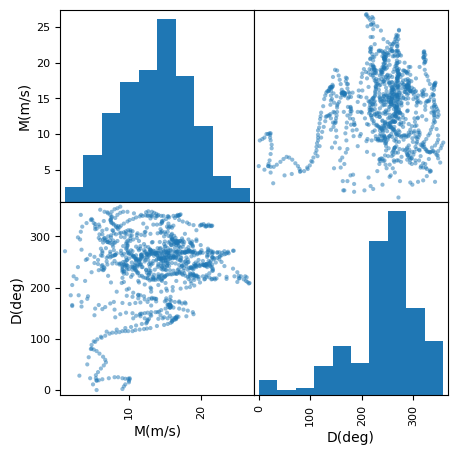

In [ ]:
# Ahora lo graficamos ya ordenado
pd.plotting.scatter_matrix(df_ordenado, alpha=0.5, figsize=(5, 5))


## 3.   Histórico de la velocidad media:


In [10]:
#Agregamos 2 columnas nuevas para año y mes en base al indice Timestamp
df_principal['year'] = df_principal.index.year
df_principal['month'] = df_principal.index.month
df_principal.tail(5)

,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%),year,month
Timestamp,,,,,,,,,
2015-09-10 19:00:00,9.2,85,16.1,1.22,1008.5,0.25,67.9,2015,9
2015-09-10 20:00:00,9.2,85,16.2,1.21,1008.3,0.28,68.0,2015,9
2015-09-10 21:00:00,9.5,87,16.2,1.21,1008.1,0.24,69.1,2015,9
2015-09-10 22:00:00,10.0,90,16.0,1.21,1008.0,0.10,72.3,2015,9
2015-09-10 23:00:00,10.0,94,15.8,1.22,1007.9,-0.06,73.9,2015,9


In [16]:
df_principal.groupby( by = ["year", "month"]).mean().tail(21)

M(m/s)      D(deg)       T(C)  De(k/m3)     PRE(hPa)  \
year month                                                            
2014 1      12.961156  205.009409   6.485618  1.235672   991.236694   
     2      14.528125  200.453869   6.725000  1.231071   988.319643   
     3       9.064785  180.034946   7.947043  1.244892  1003.909409   
     4       8.428750  168.262500   9.915417  1.234958  1002.885417   
     5       8.235349  156.686828  11.553091  1.228266  1003.170565   
     6       6.188056  171.093056  13.692500  1.224000  1007.069306   
     7       8.442473  185.318548  16.789516  1.205524  1002.840054   
     8       8.891801  214.743280  15.738710  1.205739   999.212366   
     9       6.275000  149.506944  15.561528  1.215972  1007.214028   
     10     10.676882  204.163978  13.862231  1.215497  1000.977419   
     11      9.564861  170.513889  10.120972  1.225986   996.348194   
     12     12.112500  223.760753   6.398522  1.253333  1005.323253   
2015 1      12.050134  230.928763   5.115726  1.254126  1001.281586   
     2      10.035863  207.666667   4.243750  1.261756  1004.027530   
     3      10.561156  199.865591   5.813038  1.259355  1007.904973   
     4       8.027083  148.908333   7.410556  1.254722  1009.644028   
     5       9.739382  198.940860  10.332930  1.233306  1002.844355   
     6       9.018056  184.073611  13.198056  1.226583  1007.699722   
     7       9.500134  213.376344  15.979435  1.208266  1002.097043   
     8       8.748522  178.634409  16.672849  1.205793  1002.613978   
     9       8.111250  228.179167  13.572500  1.226750  1008.782500   

             RiNumber      RH(%)  
year month                        
2014 1      -5.892648  88.939382  
     2      -0.111354  85.618601  
     3       0.992796  80.151613  
     4       2.874597  82.430139  
     5      -1.919798  77.990995  
     6      -3.471125  79.183333  
     7       1.312406  82.391263  
     8     -32.234987  78.779032  
     9      -6.323806  84.641806  
     10     -2.887392  84.766263  
     11    -22.561194  88.337917  
     12    -32.395968  83.876478  
2015 1      -9.476452  83.369489  
     2      -1.641979  85.629315  
     3      -0.255202  82.190860  
     4       7.899097  80.340556  
     5     -24.802487  79.199194  
     6       2.812069  77.231250  
     7     -25.583333  79.110349  
     8      -1.191586  79.181855  
     9     -31.738208  79.375000

##Ahora grafiquemoslo

<Axes: xlabel='year,month'>

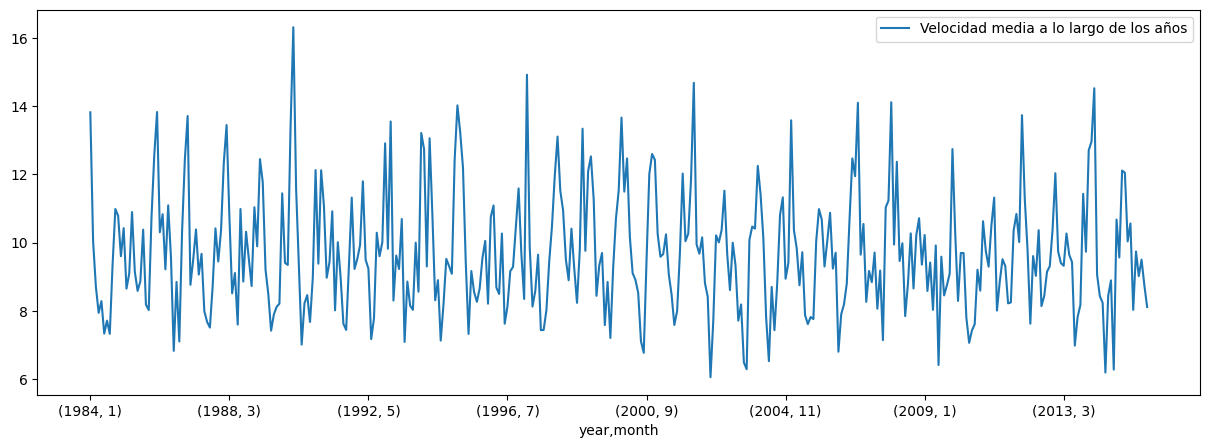

In [20]:
df_principal.groupby(by = ['year', 'month']).mean().plot(y = 'M(m/s)', label = "Velocidad media a lo largo de los años", figsize=(15,5))
#Obtenemos un grafico con el histórico de la velocidad media (M(m/s) en los alpes a lo largo de 21 años